# Отток клиентов

Из банка стали уходить клиенты: в месяц понемногу, но заметно. Маркетологи банка вычислили: сохранять текущих клиентов дешевле, чем завлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в скором времени или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Целевая метрика модели -  *F1*-мера. Требуется довести метрику на тестовой выборке хотя бы до 0.59.

Дополнительно следует контролировать метрику *AUC-ROC* и сравнивать её значение с *F1*-мерой.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-подготовка-данных" data-toc-modified-id="Обзор-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-датасета" data-toc-modified-id="Обзор-датасета-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор датасета</a></span><ul class="toc-item"><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Вывод.</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Корреляция-численных-признаков" data-toc-modified-id="Корреляция-численных-признаков-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Корреляция численных признаков</a></span></li><li><span><a href="#Дополнительно:-немного-анализа" data-toc-modified-id="Дополнительно:-немного-анализа-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Дополнительно: немного анализа</a></span><ul class="toc-item"><li><span><a href="#Возраст-и-стаж" data-toc-modified-id="Возраст-и-стаж-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Возраст и стаж</a></span></li><li><span><a href="#Остаток-на-счете" data-toc-modified-id="Остаток-на-счете-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>Остаток на счете</a></span></li><li><span><a href="#Число-продуктов" data-toc-modified-id="Число-продуктов-1.2.2.3"><span class="toc-item-num">1.2.2.3&nbsp;&nbsp;</span>Число продуктов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2.2.4"><span class="toc-item-num">1.2.2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#One-hot-encoding" data-toc-modified-id="One-hot-encoding-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>One-hot encoding</a></span></li><li><span><a href="#Удаление-ненужных-столбцов" data-toc-modified-id="Удаление-ненужных-столбцов-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Удаление ненужных столбцов</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Добавление-признаков" data-toc-modified-id="Добавление-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Добавление признаков</a></span></li><li><span><a href="#Разбиение-на-выборки" data-toc-modified-id="Разбиение-на-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разбиение на выборки</a></span></li><li><span><a href="#Испытания-без-балансировки-классов" data-toc-modified-id="Испытания-без-балансировки-классов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Испытания без балансировки классов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Балансировка-классов" data-toc-modified-id="Балансировка-классов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Балансировка классов</a></span><ul class="toc-item"><li><span><a href="#Oversampling" data-toc-modified-id="Oversampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Oversampling</a></span><ul class="toc-item"><li><span><a href="#Синтетический-ресамплинг-через-SMOTE" data-toc-modified-id="Синтетический-ресамплинг-через-SMOTE-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Синтетический ресамплинг через SMOTE</a></span></li></ul></li><li><span><a href="#Undersampling" data-toc-modified-id="Undersampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Undersampling</a></span></li><li><span><a href="#class_weights" data-toc-modified-id="class_weights-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>class_weights</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подстройка-гиперпараметров" data-toc-modified-id="Подстройка-гиперпараметров-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подстройка гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li><li><span><a href="#Объединение-выборок-и-повторная-проверка" data-toc-modified-id="Объединение-выборок-и-повторная-проверка-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Объединение выборок и повторная проверка</a></span></li><li><span><a href="#Использование-признаков" data-toc-modified-id="Использование-признаков-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Использование признаков</a></span></li><li><span><a href="#Сравнение-с-фиктивными-моделями" data-toc-modified-id="Сравнение-с-фиктивными-моделями-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Сравнение с фиктивными моделями</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Рекомендации-по-запонению-данных" data-toc-modified-id="Рекомендации-по-запонению-данных-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Рекомендации по запонению данных</a></span></li></ul></li></ul></div>

## Обзор и подготовка данных

### Обзор датасета

In [1]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 189 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 23.2 MB 130 kB/s eta 0:00:01


In [2]:
# Импортируем необходимые модули:
import pandas as pd

from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn import base
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
from tqdm import tqdm

import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline

Ознакомимся с общей информацией и первыми строками таблицы:

In [3]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Сразу обращает на себя внимание бессодержательный столбец `RowNumber`, дублирующий индексацию.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
df.duplicated().sum()

0

#### Вывод.

Предоставлены данных о 10000 клиентов по 13 признакам (в том числе 7 числовым и 6 категориальным, 3 из которых бинарны). Для использование в сочетании с sklearn выглядит целесообразным сохранить вещественные типы, а также провести кодирование столбцов `Geography` (страна проживания) и `Gender` (пол клиента). Признак `Surname` (фамилия) выглядит нерелеватным поставленной задаче (вряд ли фамилия влияет на удовлетворенность клиента, кроме того, признак слабо поддается кодированию) и может быть исключен из модели. То же можно сказать об идентификаторе клиента (`CustomerId`).

Около 10% значений в столбце `Tenure` (клиентский стаж) пропущено. Явно дублированных строк не наблюдается.

Звголовки столбцов удовлетворительны.

### Предобработка данных

#### Корреляция численных признаков

In [7]:
numeric = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

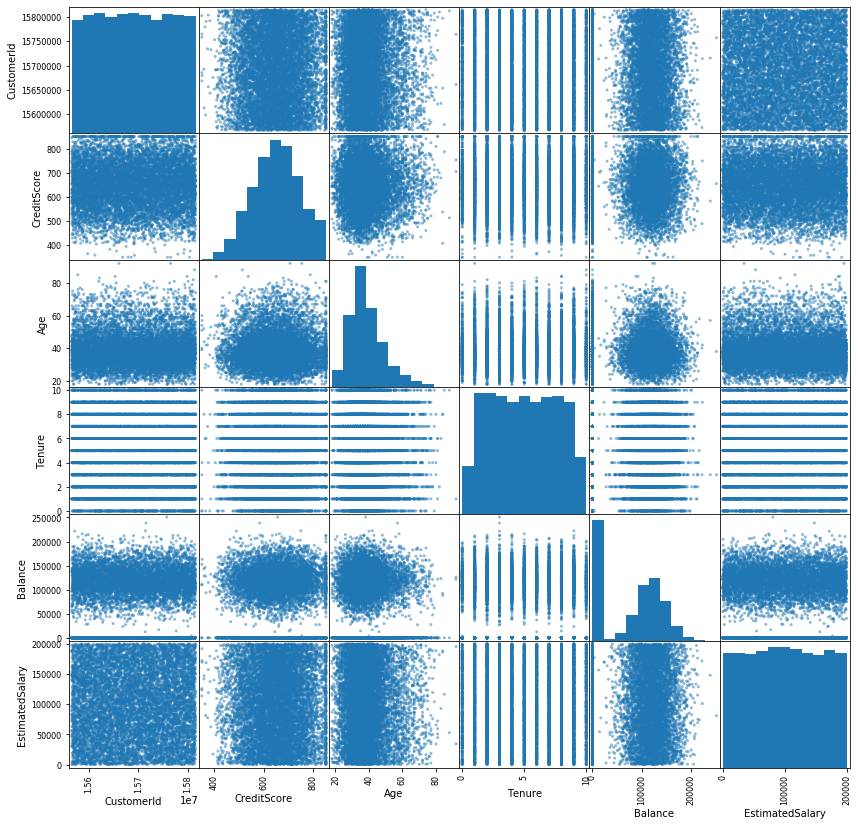

In [8]:
pd.plotting.scatter_matrix(df[numeric], figsize=(14,14), hist_kwds={'bins':11});

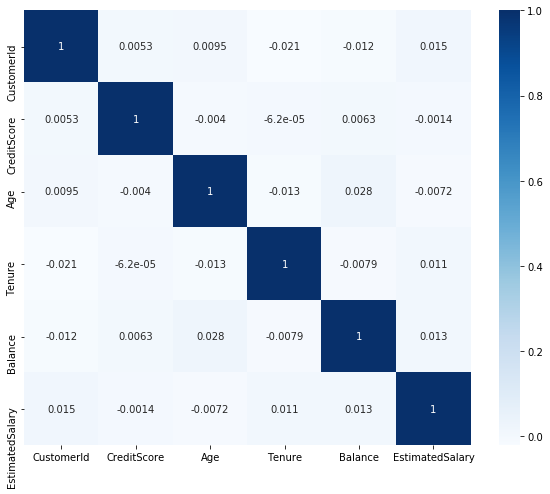

In [9]:
plt.figure (figsize=(10,8))
sns.heatmap (df[numeric].corr(), annot=True, cmap='Blues');

Количественные признаки не обнаруживают мультиколлинеарности. Но есть другие интересные наблюдения! Хотя они не относятся непосредственно к задаче моделирования, мы не можем на них не остановиться; кроме того, это может помочь оценить работу моделей.

#### Дополнительно: немного анализа

##### Возраст и стаж

Мы видим, что возраст клиента слабо "коррелирует" с оттоком, а стаж - нет. Здесь, конечно, нельзя говорить о реальной корреляции, поскольку отток - признак бинарный, но поглядеть, как это выглядит на самом деле, было бы интересно:

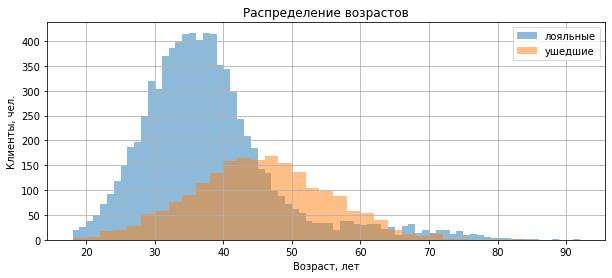

In [10]:
_, ax = df.groupby('Exited')['Age'].hist(bins='fd', figsize=(10,4), alpha=0.5);
ax.set(xlabel='Возраст, лет', ylabel='Клиенты, чел.', title='Распределение возрастов')
ax.legend(['лояльные', 'ушедшие']);

Разница действительно есть: распределение возрастов в обеих группах близко к нормальному, но средний возраст среди уходящих клиентов заметно выше: около 45 лет против 36-37 у лояльных:

In [11]:
df.groupby('Exited')['Age'].agg(['mean','median'])

,mean,median
Exited,,
0,37.408389,36
1,44.837997,45


Убедимся в достаточной репрезентативности выборок с помощью статистического теста, взяв в качестве *нулевой гипотезы* равенство средних возрастов среди лояльных и ушедших клиентов.

In [12]:
def ttest (set1, set2):
    alpha = 0.01
    # Мы сразу воспользуемя тестом Уэлча (equal_var=False):
    result = st.ttest_ind (set1, set2, equal_var=False) 

    print ('Тест на равенство средних:')
    print ('P-значение:', result.pvalue)

    if (result.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

def utest (set1, set2):
    alpha = 0.01
    result = st.mannwhitneyu (set1, set2) 

    print ('Тест на равенство распределений:')
    print ('P-значение:', result.pvalue)

    if (result.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [13]:
ttest(df.query('Exited == 1')['Age'], df.query('Exited == 0')['Age'])

Тест на равенство средних:
P-значение: 4.7127272656641046e-179
Отвергаем нулевую гипотезу


Расхождение явно выглядит не случайным: с уровнем значимости 1% можно принять, что средние двух групп действительно различаются.

Со стажем же такой картины нет: свежих клиентов и клиентов с максимальным стажем в обеих группах меньше, чем всех остальных, в "середине" же распределение почти равномерное.

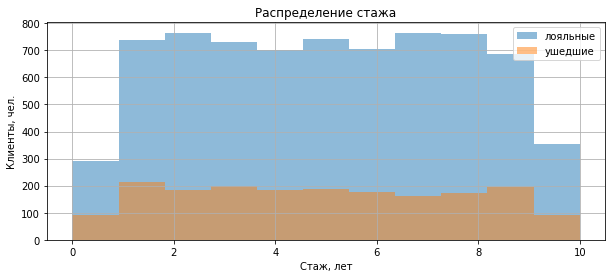

In [14]:
_, ax = df.groupby('Exited')['Tenure'].hist(bins=11, figsize=(10,4), alpha=0.5);
ax.set(xlabel='Стаж, лет', ylabel='Клиенты, чел.', title='Распределение стажа')
ax.legend(['лояльные', 'ушедшие']);

Средние значения в обоих случаях находятся ровно посредине шкалы: 5 лет стажа.

In [15]:
df.groupby('Exited')['Tenure'].agg(['mean','median'])

,mean,median
Exited,,
0,5.022247,5.0
1,4.901834,5.0


Распределение достаточно далеко от нормального, но в порядке исследовательского интереса попробуем применить t-тест для проверки нулевой гипотезы о равенстве среднего стажа двух групп, а затем проверим гипотезу о равенстве распределений с помощью непараметрического u-теста:

In [16]:
ttest (df.query('Exited == 1 and Tenure.notna()')['Tenure'], df.query('Exited == 0 and Tenure.notna()')['Tenure'])

Тест на равенство средних:
P-значение: 0.11472759679742621
Не получилось отвергнуть нулевую гипотезу


In [17]:
utest (df.query('Exited == 1 and Tenure.notna()')['Tenure'], df.query('Exited == 0 and Tenure.notna()')['Tenure'])

Тест на равенство распределений:
P-значение: 0.05501228938058297
Не получилось отвергнуть нулевую гипотезу


Как видим, расхождения и впрямь невелики: с уровнем значимости в 1% можно принять, что распределение стажа среди лояльных и ушедших клиентов одинаково.

##### Остаток на счете

Довольно много клиентов (около 36%) имеют нулевой баланс счета:

In [18]:
df['Balance'].value_counts(normalize=True).sort_index().head()

0.00        0.3617
3768.69     0.0001
12459.19    0.0001
14262.80    0.0001
16893.59    0.0001
Name: Balance, dtype: float64

Есть также намек на зависимость баланса и оттока: быть может, богатые клиенты начинают искать банк получше?

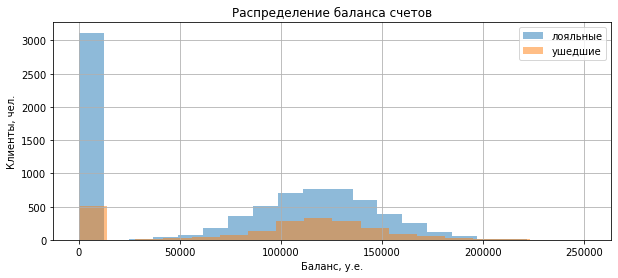

In [19]:
_, ax = df.groupby('Exited')['Balance'].hist(bins='fd', figsize=(10,4), alpha=0.5);
ax.set(xlabel='Баланс, у.е.', ylabel='Клиенты, чел.', title='Распределение баланса счетов')
ax.legend(['лояльные', 'ушедшие']);

В данном случае распределение остатков на счете достаточно похоже у лояльных и ушедших клиентов, однако можно заметить, что среди лояльных нулевой баланс встечается куда чаще. Возможно, это и создает видимость "корреляции". Посмотрим поближе на нормальную часть распределения:

In [20]:
df.query('Balance != 0')['Balance'].groupby(df['Exited']).agg(['mean','median'])

,mean,median
Exited,,
0,119535.864270,119791.215
1,120746.971132,119948.090


Проверим *нулевую гипотезу* о том, что в нормальной части (без нулевых балансов) средние балансы двух групп равны:

In [21]:
ttest(df.query('Exited == 1 and Balance != 0')['Balance'], df.query('Exited == 0 and Balance != 0')['Balance'])

Тест на равенство средних:
P-значение: 0.17379960354870824
Не получилось отвергнуть нулевую гипотезу


В *нормальной части*, как видим, P-value велико, и можно принять, что разницу действительно создают лишь клиенты с нулевым балансом. Любопытно!

##### Число продуктов

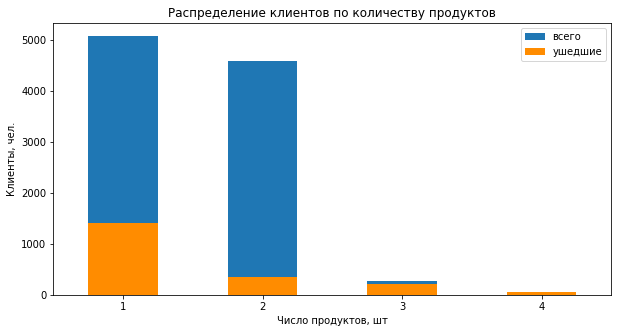

In [22]:
ax=df.groupby('NumOfProducts')['Exited'].count().plot(kind='bar', figsize=(10,5), rot=0);
df.groupby('NumOfProducts')['Exited'].sum().plot(ax=ax, kind='bar', figsize=(10,5), color='darkorange', rot=0);
ax.set(xlabel='Число продуктов, шт', ylabel='Клиенты, чел.', title='Распределение клиентов по количеству продуктов')
ax.legend(['всего', 'ушедшие']);

Зависимость неравномерная: у пользователей одного продукта отток порядка 30%, у пользователей двух - значительно меньше, а пользователи большего числа уходят почти все! Также из таблицы корреляций можно заметить, что чем большим числом продуктов пользуется клиент, там меньше у него денег на счету - впрочем, выборка клиентов с 3-4 продуктами очень мала относительно общего числа (порядка 3%), чтобы говорить о закономерностях.

##### Вывод

Мы провели небольшой анализ признаков, претендующих на линейное взаимное влияние, и можем сказать следующее:

- Лояльные клиенты определенно младше уходящих (в среднем 36-37 лет против 45), это подтверждается статистическим тестом. Хорошие модели безусловно должно принимать это во внимание.
- Напротив, клиентский стаж не оказывает заметного влияния на шанс оттока. Возможно, **можно и вовсе исключить этот признак из модели** и не раздумывать над заполнением пропусков. Это ускорит работу модели и не повредит ее качеству.
- Среди клиентов с нулевым балансом больше лояльных; в остальном же распределение остатков на счете практически одинаково. **Стоит уделить внимание введению соответствующих новых признаков, производных от баланса.**
- Уходит очень большой процент клиентов, пользующихся 3-4 банковскими продуктами, а самые лояльные пользуются двумя. **Это должно отображаться в качественной модели**.
- Наконец, активные клиенты как будто бы меньше склонны закрыть счет. Трактовать это можно по-разному, поскольку критерии активности не оговорены, - быть может, это очевидный показатель лояльности, а быть может - показатель лени.

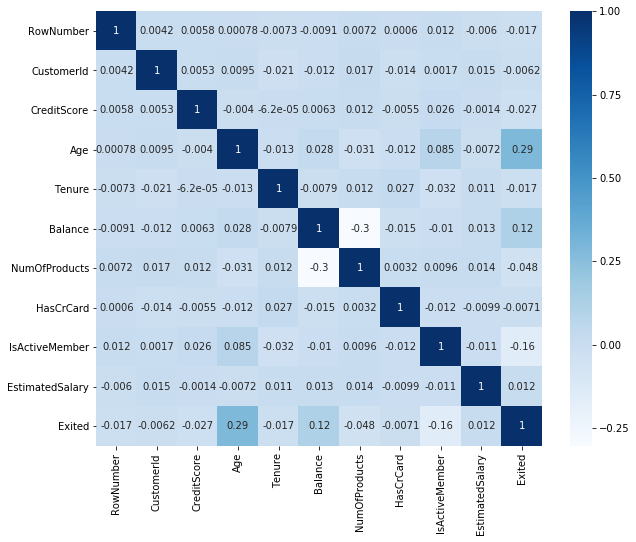

In [23]:
plt.figure (figsize=(10,8))
sns.heatmap (df.corr(), annot=True, cmap='Blues');

#### One-hot encoding

Для работы стандартных моделей sklearn нам нужно будет кодировать категориальные признаки. Поскольку мы хотим испробовать несколько видов моделей, предпочтительней использовать one-hot encoding: одни модели с ним работают лучше, а другим он как минимум не помешает.

In [24]:
def one_hot(df, columns):
    try:
        dummies = pd.get_dummies(df[columns], drop_first=True)
        df[dummies.columns] = dummies
        return df
    except:
        print('Проверьте правильность переданных аргументов!')

In [25]:
encoded_columns = ['Gender', 'Geography']

df[encoded_columns].head().join(pd.get_dummies(df[encoded_columns], drop_first=True).head())

,Gender,Geography,Gender_Male,Geography_Germany,Geography_Spain
0,Female,France,0,0,0
1,Female,Spain,0,0,1
2,Female,France,0,0,0
3,Female,France,0,0,0
4,Female,Spain,0,0,1


#### Удаление ненужных столбцов

На всякий случай проверим, нет ли дубликатов среди идентификаторов пользователей, прежде чем дропнуть ненужные для модели столбцы:

In [26]:
df['CustomerId'].duplicated().sum()

0

In [27]:
def drop_unused_columns (df, column_list):
    return df.drop (column_list, axis=1)

unused_columns = ['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender', 'Tenure']

In [28]:
df = (
    df
    .pipe(one_hot, encoded_columns)
    .pipe(drop_unused_columns, unused_columns)
)
df.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,0,1


## Исследование задачи

### Добавление признаков

Исходя из аналитической части, видится целесообразным ввести пару новых признаков, производных от баланса клиента, а именно `ZeroBalance` (бинарный признак нулевого баланса) и `BalanceSalaryRatio` (отношение остатка на счету к уровню дохода).

In [29]:
df['ZeroBalance'] = (df['Balance'] == 0) * 1
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

In [30]:
df.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,ZeroBalance,BalanceSalaryRatio
0,619,42,0.00,1,1,1,101348.88,1,0,0,0,1,0.000000
1,608,41,83807.86,1,0,1,112542.58,0,0,0,1,0,0.744677
2,502,42,159660.80,3,1,0,113931.57,1,0,0,0,0,1.401375
3,699,39,0.00,2,0,0,93826.63,0,0,0,0,1,0.000000
4,850,43,125510.82,1,1,1,79084.10,0,0,0,1,0,1.587055


### Разбиение на выборки

In [31]:
# Зафиксируем состояние генератора случайных чисел для воспроизведения результатов:
random_state = 177013

Выделим тестовую выборку в размере 20% от датасета (ее мы не будем трогать до финального тестирования), а также валидационную выборку такого же размера (ее мы будем использовать для оценки качества моделей и настройки гиперпараметров).

In [32]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']
features_train_valid, features_test, target_train_valid, target_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, target_train_valid, test_size=0.25, random_state=random_state)

### Испытания без балансировки классов

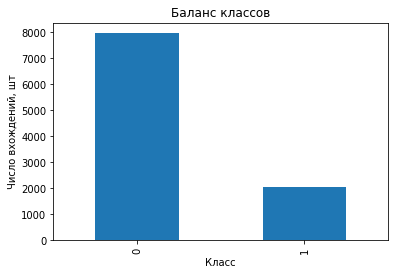

In [33]:
df['Exited'].value_counts().plot(kind='bar').set(title='Баланс классов', xlabel='Класс', ylabel='Число вхождений, шт');

Датасет действительно не сбалансирован: на отток приходится лишь около 20% наблюдений.

Для оценки качества классификации без балансировки классов построим несколько моделей со стандартными параметрами и изучим следующие показатели:

- метрики F1 и ROC_AUC (нас интересует в первую очередь положительный класс, поскольку меньшинство, как правило, предсказывается хуже, кроме того, точность предсказания оттока явно важнее по сути техзадания);
- матрицу ошибок.

In [34]:
# Функция обучения моделей с параметрами по умолчанию.
# Аргументы: класс модели, обучающая выборка и (необязательно) режим еспользования сбалансированной развесовки классов.
# Возвращает метрики на общей валидационной выборке в формате Series и матрицу ошибок.
def train (model, X, y, balanced_weights=False):
    model_instance = None
    class_weights = None
    
    # CatBoost не имеет режима class_weight='balanced', для него веса зададим вручную:
    if balanced_weights == True:
        if model == CatBoostClassifier:
            class_weights = [0.8, 0.2]
        else:
            class_weights = 'balanced'
    
    if model == LogisticRegression:
        model_instance = model (random_state=random_state, solver='lbfgs', class_weight=class_weights)
    elif model == RandomForestClassifier:
        model_instance = model (random_state=random_state, n_estimators=100, class_weight=class_weights)
    elif model == CatBoostClassifier:
        model_instance = model (random_state=random_state, verbose=0, class_weights=class_weights)
    else:
        model_instance = model (random_state=random_state, class_weight=class_weights)

    # Проведем стандартизацию признаков:
    scaler = StandardScaler()
    scaler.fit (X)
    features_train_scaled = scaler.transform (X)
    features_valid_scaled = scaler.transform (features_valid)

    # Обучим модель:
    model_instance.fit (features_train_scaled, y)
        
    # Вычислим интересующие нас метрики:
    predictions_valid = model_instance.predict (features_valid_scaled)
    probabilities_valid = model_instance.predict_proba (features_valid_scaled)[:, 1]
    
    f1 = f1_score (target_valid, predictions_valid)
    roc_auc = roc_auc_score (target_valid, probabilities_valid)
    cmatrix = confusion_matrix(target_valid, predictions_valid)
    
    stat = pd.Series ([type(model_instance).__name__, f1, roc_auc], index=['Model', 'F1', 'ROC_AUC'])
    return stat, cmatrix

In [35]:
model_list = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, CatBoostClassifier]
stats = pd.DataFrame({'Model':[], 'F1':[], 'ROC_AUC':[]})
cmatrices = []

for model in tqdm(model_list):
    stat, cmatrix = train (model, features_train, target_train)
    stats = stats.append (stat, ignore_index=True)
    cmatrices.append (cmatrix)

100%|██████████| 5/5 [00:47<00:00,  9.44s/it]


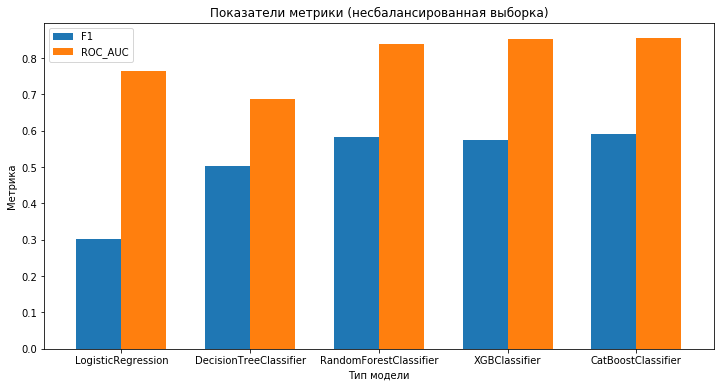

In [36]:
stats.plot(kind='bar', x='Model', rot=0, figsize=(12,6), width=0.7).set(xlabel='Тип модели', ylabel='Метрика', title='Показатели метрики (несбалансированная выборка)');

**Логистическая регрессия** показывает посредственную F1: около 0,3 при ROC_AUC порядка 0,76. Это вызвано довольно большим количеством ложноотрицательных результатов и очень маленьким - истинно положительных. Эта модель, как и следовало ожидать, сильнее всех страдает от дисбаланса выборки.

**Дерево решений** выдает F1 около 0.5 при ROC_AUC около 0,69. Эта модель выдает больше ложноположительных ответов, но с истинно положительными дела обстоят уже получше.

**Случайный лес** уже вплотную приближается к заданному качеству: 0,58 F1 при ROC_AUC чуть меньше 0.84. Проблемой остаются в основном ложноотрицательные ответы.

**XGBoost** отстает несильно: 0,57 F1 и 0,85 ROC_AUC (с ложноотрицательными результатами чуть хуже, зато лучше с положительной частью), а **CatBoost** даже сходу побивает условия техзадания - 0.59 F1! Метрика ROC_AUC сходна с предыдущими моделями: 0,85 - эта модель, наоборот, лучше показывает себя на отрицательной части матрицы результатов.

Балансировка классов должна помочь нам уменьшить ложнотрицательную часть - это будет иметь свою цену, но в целом должно помочь нам улучшить целевую метрику.

In [37]:
stats

,Model,F1,ROC_AUC
0,LogisticRegression,0.300917,0.763745
1,DecisionTreeClassifier,0.503008,0.687864
2,RandomForestClassifier,0.581709,0.839260
3,XGBClassifier,0.574961,0.853704
4,CatBoostClassifier,0.591508,0.854982


In [38]:
def visualize_matrices(matrices):
    fig, axes = plt.subplots(3, 2, figsize=(10,13), constrained_layout=True)
    axes[2,1].set_axis_off()
    for cmatrix, ax, i in zip(cmatrices, axes.flat, range(6)):
        sns.heatmap(cmatrix, annot=True, ax=ax, cmap='Blues', fmt='d').set(title=stats.loc[i, 'Model'], xlabel='Предсказания', ylabel='Правильные ответы')

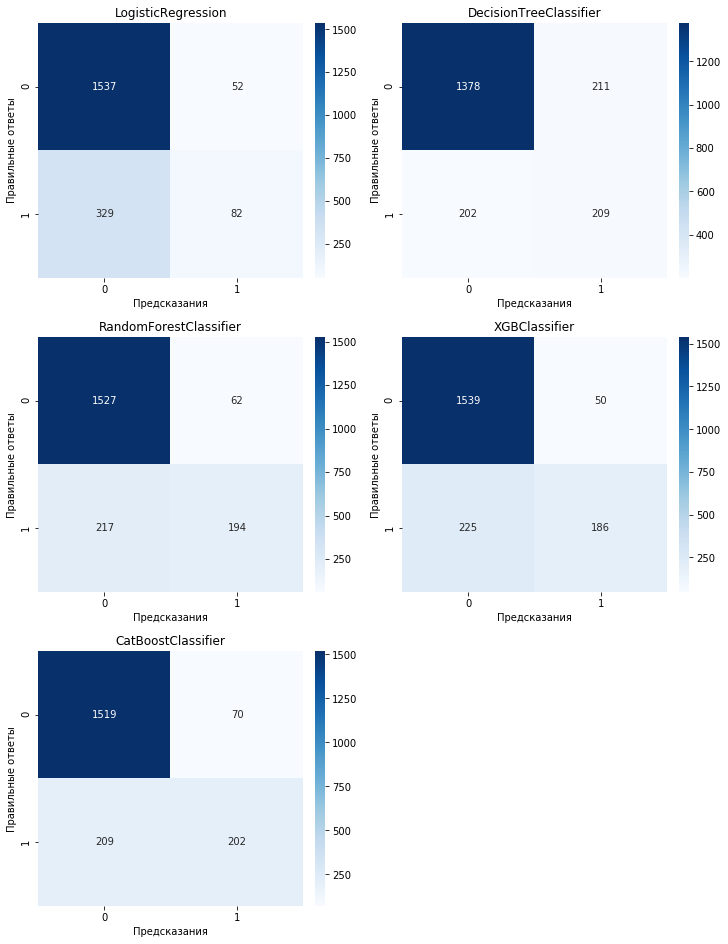

In [39]:
visualize_matrices(cmatrices)

### Вывод

Дисбаланс выборки определенно требует принять меры: из реально ушедших клиентов в валидационной выборке детектируется в лучшем случае около половины. При этом метрика ROC_AUC выглядит чрезмерно оптимистичной - это характерно для случаев несбалансированных классов.

## Балансировка классов

Оцением влияние разных методов балансировки датасета на качество предсказаний:
 - увеличение доли положительного класса в обучающей выборке;
 - уменьшение доли отрицательного класса в выборке;
 - настройка развесовки для моделей.

### Oversampling

Увеличим долю положительного класса с помощью *sklearn.resample()*:

In [40]:
df_train = features_train.copy()
df_train['Exited'] = target_train
df_loyal =  df_train[df_train['Exited']==0]
df_exited = df_train[df_train['Exited']==1]

df_exited_oversampled = resample(df_exited, replace=True, n_samples=len(df_loyal), random_state=random_state)
df_train_oversampled = pd.concat([df_loyal, df_exited_oversampled])

df_train_oversampled['Exited'].value_counts()

1    4776
0    4776
Name: Exited, dtype: int64

In [41]:
features_train_oversampled = df_train_oversampled.drop(['Exited'], axis=1)
target_train_oversampled = df_train_oversampled['Exited']

И оценим качество моделей на новой выборке:

In [42]:
stats = pd.DataFrame({'Model':[], 'F1':[], 'ROC_AUC':[]})
cmatrices = []

for model in tqdm(model_list):
    stat, cmatrix = train (model, features_train_oversampled, target_train_oversampled)
    stats = stats.append (stat, ignore_index=True)
    cmatrix = cmatrices.append (cmatrix)

100%|██████████| 5/5 [00:55<00:00, 11.06s/it]


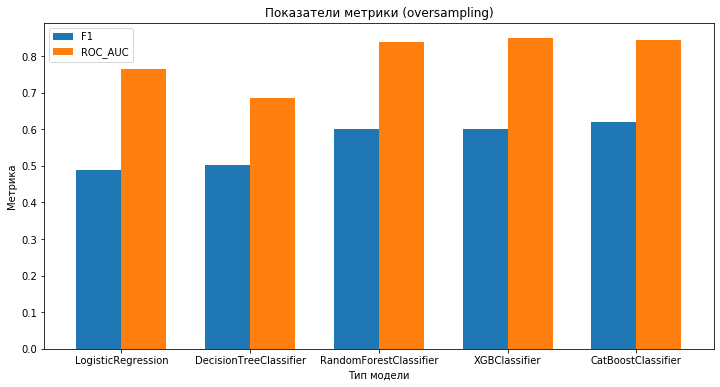

In [43]:
stats.plot(kind='bar', x='Model', rot=0, figsize=(12,6), width=0.7).set(xlabel='Тип модели', ylabel='Метрика', title='Показатели метрики (oversampling)');

**Логистическая регрессия** заметно улучшила метрику: F1 около 0,49, ROC_AUC при этом практически не изменился (0,76). Ложноотрицательные и истинно положительные результаты пришли в норму, зато стало много ложноположительных.

**Дерево решений** практически не изменило метрику (F1 около 0.50 при ROC_AUC около 0,69). Распределение предсказаний тоже изменилось незначительно.

**Случайный лес** улучшил показатели (0,6 F1, 0,84 ROC_AUC). Число ложноположительных результатов заметно выросло, но баланс нижней части матрицы изменился в лучшую сторону.

**XGBoost** преодолел 0,6 F1 и сохранил 0,85 ROC_AUC: за счет качества истинно отрицательных и ложноположительных результатов улучшилось положение с истинно положительными и ложноотрицательными - примерно то, чего мы и хотели добиться.

**CatBoost** тоже чувствует себя хорошо (0,62 F1 и 0,84 ROC_AUC) невзирая на сильный рост ложноположительных срабатываний, он показывает больше истинно положительных и меньше ложноотрицательных ответов.

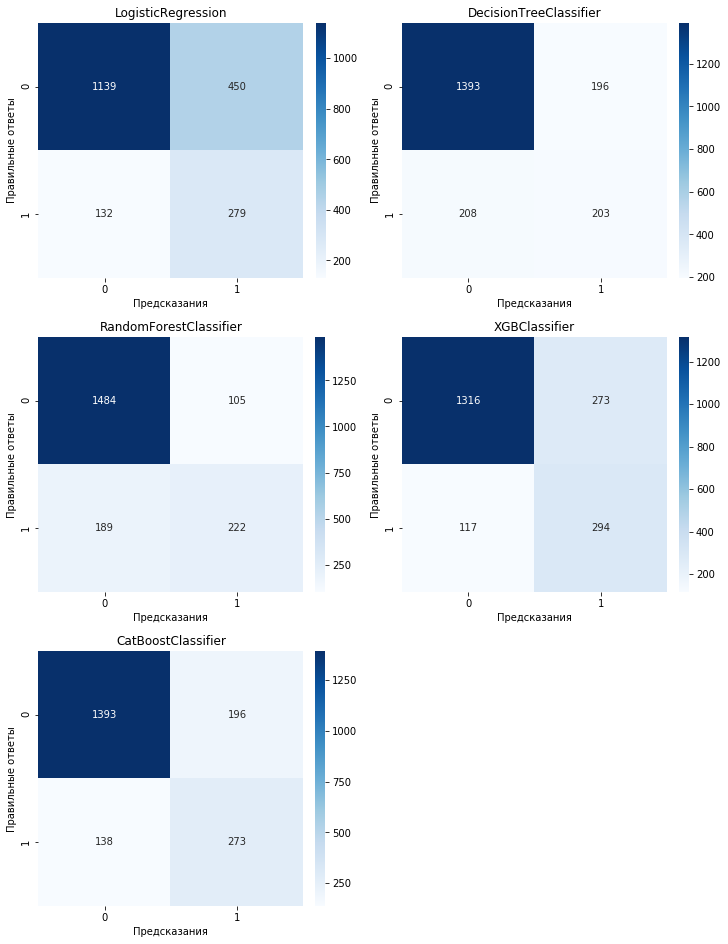

In [44]:
visualize_matrices(cmatrices)

#### Синтетический ресамплинг через SMOTE

In [45]:
resampler = SMOTE(random_state=random_state)
features_train_smoted, target_train_smoted = resampler.fit_resample(features_train, target_train)

target_train_smoted.value_counts()

1    4776
0    4776
Name: Exited, dtype: int64

In [46]:
stats = pd.DataFrame({'Model':[], 'F1':[], 'ROC_AUC':[]})
cmatrices = []

for model in tqdm(model_list):
    stat, cmatrix = train (model, features_train_smoted, target_train_smoted)
    stats = stats.append (stat, ignore_index=True)
    cmatrix = cmatrices.append (cmatrix)

100%|██████████| 5/5 [00:55<00:00, 11.09s/it]


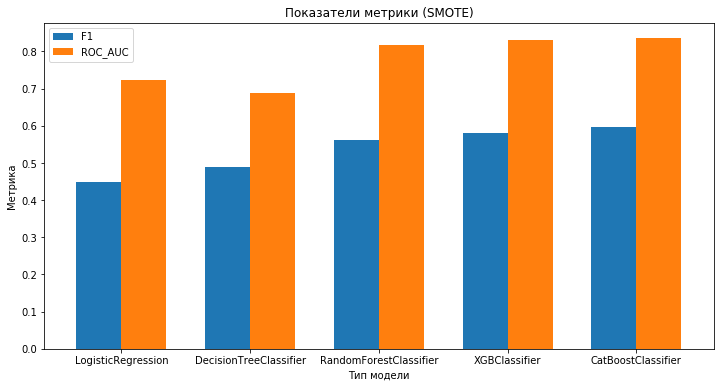

In [47]:
stats.plot(kind='bar', x='Model', rot=0, figsize=(12,6), width=0.7).set(xlabel='Тип модели', ylabel='Метрика', title='Показатели метрики (SMOTE)');

У простых моделей метрика тоже улучшилась, но не так сильно - у градиентного бустинга результаты хуже в целом, у остальных моделей улучшилась полнота положительного класса за счет роста ложноположительных срабатываний. Сохранило метрику только дерево решений - качество предсказания оттока и рост ложноположительной части уравновесили друг друга.

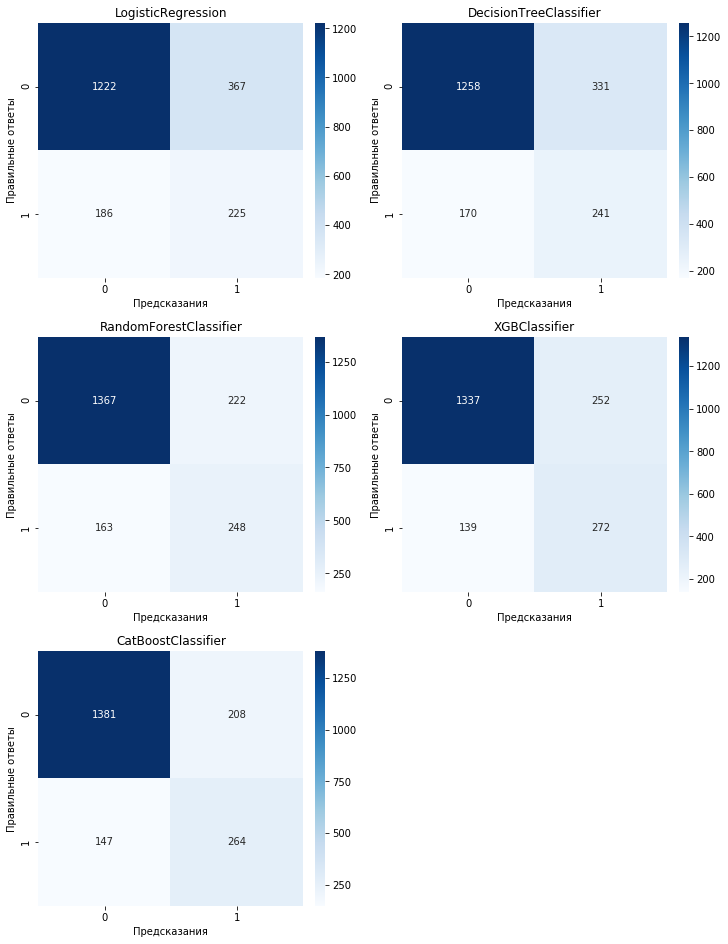

In [48]:
visualize_matrices(cmatrices)

### Undersampling

Теперь попробуем уменьшить долю отрицательного класса:

In [49]:
df_loyal_undersampled = resample(df_loyal, replace=True, n_samples=len(df_exited), random_state=random_state)
df_train_undersampled = pd.concat([df_exited, df_loyal_undersampled])

df_train_undersampled['Exited'].value_counts()

1    1224
0    1224
Name: Exited, dtype: int64

In [50]:
features_train_undersampled = df_train_undersampled.drop(['Exited'], axis=1)
target_train_undersampled = df_train_undersampled['Exited']

Посмотрим, как отреагируют модели. Следует ожидать общего ухудшения результатов относительно предыдущего метода - чем больше разных данных, тем лучше.

In [51]:
stats = pd.DataFrame({'Model':[], 'F1':[], 'ROC_AUC':[]})
cmatrices = []

for model in tqdm(model_list):
    stat, cmatrix = train (model, features_train_undersampled, target_train_undersampled)
    stats = stats.append (stat, ignore_index=True)
    cmatrix = cmatrices.append (cmatrix)

100%|██████████| 5/5 [00:27<00:00,  5.49s/it]


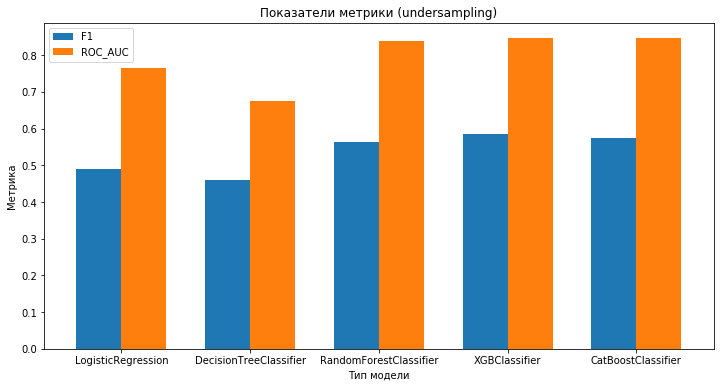

In [52]:
stats.plot(kind='bar', x='Model', rot=0, figsize=(12,6), width=0.7).set(xlabel='Тип модели', ylabel='Метрика', title='Показатели метрики (undersampling)');

В целом метод привел к заметному перекосу в сторону положительных предсказаний (как верных, так и неверных). Показатели логистической регрессии остались практически без изменений, дерево решений ухудшило метрики, показывая наихудшую долю ложноположительных результатов, Random Forest и XGBoost пострадали незначительно, CatBoost ухудшил F1 за счет некоторого роста ROC_AUC. В целом по заданным метрикам метод однозначно демонстрирует худшие результаты по сравнению с предыдущим.

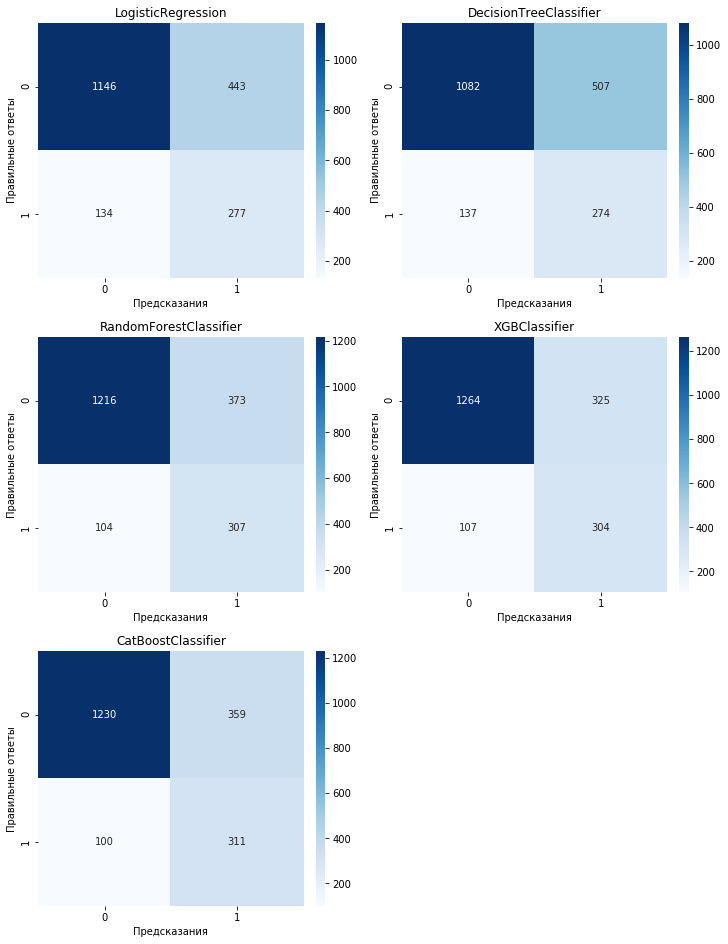

In [53]:
visualize_matrices(cmatrices)

### class_weights

Наконец, посмотрим, как поведет себя метрика при задании классам весом. Большинство классификаторов sklearn поддерживают параметр `class_weight='balanced'`, балансирующий веса автоматически, а для CatBoost мы вручную зададим веса с соотношением 1:4.

In [54]:
stats = pd.DataFrame({'Model':[], 'F1':[], 'ROC_AUC':[]})
cmatrices = []

for model in tqdm(model_list):
    stat, cmatrix = train (model, features_train, target_train, balanced_weights=True)
    stats = stats.append (stat, ignore_index=True)
    cmatrix = cmatrices.append (cmatrix)

100%|██████████| 5/5 [00:47<00:00,  9.60s/it]


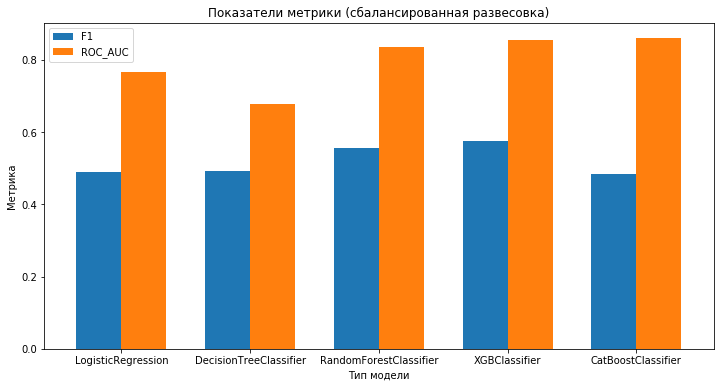

In [55]:
stats.plot(kind='bar', x='Model', rot=0, figsize=(12,6), width=0.7).set(xlabel='Тип модели', ylabel='Метрика', title='Показатели метрики (сбалансированная развесовка)');

Метод показывает среднюю результативность: у случайного леса и XGBoost результаты ближе к несбалансированной выборке, у других - к результату оверсемплинга, но нигде не показывают реального превосходства. CatBoost демонстрирует аномальный провал метрики, вероятно, модель не сходится с дефолтными параметрами или слишком чувствительна к порогу в данном случае.

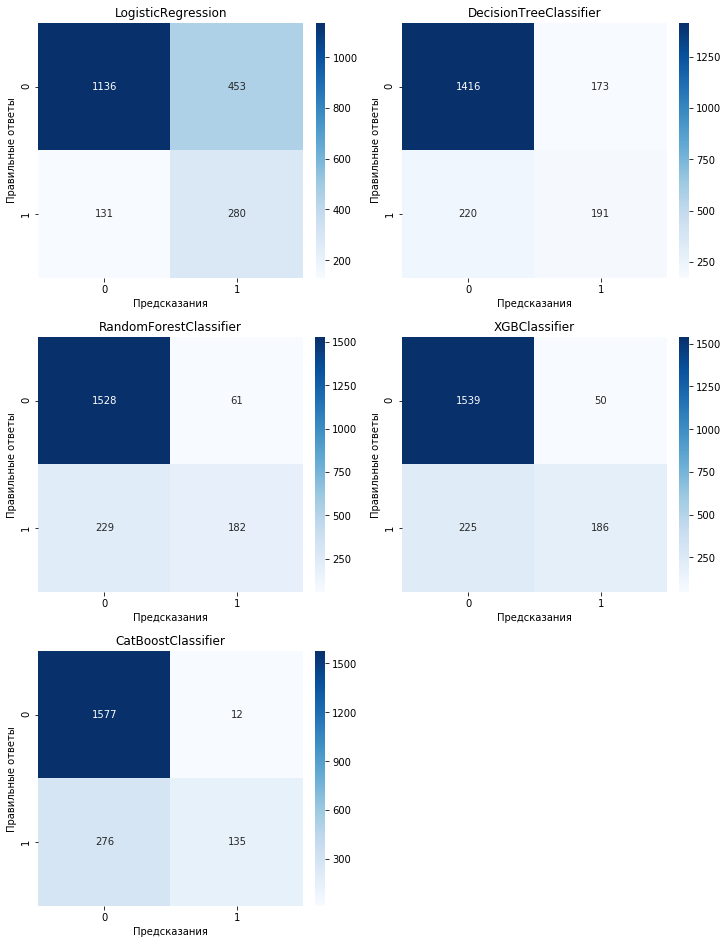

In [56]:
visualize_matrices(cmatrices)

### Вывод

Испытание разных методов балансировки дало ожидаемый результат: балансировка класса-меньшинства (в нашем случае положительного класса) за счет оверсемплинга дает лучшую требуемую метрику.

## Подстройка гиперпараметров

Модель линейной регрессии довольно далека от требований метрики, и мы уже можем исключить ее из числа кандидатов. Случайный лес, XGBoost и CatBoost выглядят наиболее привлекательно, заодно попробуем подтянуть до требуемой метрики и дерево решений.

In [57]:
def imblearn_pipeline (model, X, y, params):

    model = Pipeline([('oversampler', RandomOverSampler(random_state=random_state)), ('classifier', model)])

    gcv = GridSearchCV (estimator=model, param_grid=params, cv=2, scoring='f1', n_jobs=-1)
    gcv.fit (X, y)

    return gcv

In [58]:
global_scaler = StandardScaler()
features_train_valid_scaled = global_scaler.fit_transform(features_train_valid)

def optimize(model, params):
    print(f'Оптимизация {type(model).__name__}...')
    clf = imblearn_pipeline (model, features_train_valid_scaled, target_train_valid, params) 
    print(f'Лучшие параметры: {clf.best_params_}')
    print(f'F1: {clf.best_score_:.2f}')
    return clf.best_estimator_

<div> Поскольку совмещать ресамплинг и кроссвалидацию вручную не так-то просто (чревато утечкой данных между выборками), поступим следующим образом:
    <li>воспользуемся конвейером из imblearn (ресамплинг включается на обучении, но не на валидации);</li>
    <li>используем RandomOverSampler как самый близкий к нашему стандарному варианту;</li>
    <li>явно указывать выборку для валидации (PredefinedSplit) не будем, пусть GridSearchCV выбирает их сам из объединения train+valid;</li>
</div>

Ориентировочное время на оптимизацию: 40 мин.

### Дерево решений

In [59]:
tree_params = {
                'classifier__max_depth' : range(2,11),
                'classifier__min_samples_leaf' : range(1,5)
              }

best_tree = optimize (DecisionTreeClassifier(random_state=random_state), tree_params)

Оптимизация DecisionTreeClassifier...
Лучшие параметры: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2}
F1: 0.57


### Случайный лес

In [60]:
forest_params = {
                  'classifier__max_depth' : range (5,12),
                  'classifier__n_estimators' : [20, 50, 100],
                  'classifier__min_samples_leaf' : range (1,6),
                  'classifier__max_features' : range(1,6)
                }

best_forest = optimize (RandomForestClassifier(random_state=random_state), forest_params)

Оптимизация RandomForestClassifier...
Лучшие параметры: {'classifier__max_depth': 9, 'classifier__max_features': 4, 'classifier__min_samples_leaf': 4, 'classifier__n_estimators': 100}
F1: 0.63


Стоит отметить, что дальнейшее улучшение метрики за счет увеличения количества деревьев возможно, но в режиме онлайн нецелесообразно: время на исполнение кода сильно возрастает, а улучшение незначительно.

### XGBoost

In [61]:
xgb_params = {
                'classifier__max_depth' : range (1,5),
                'classifier__n_estimators' : [20, 50, 100, 200],
                'classifier__min_child_weight' : range(1,5)
             }

best_xgb = optimize (XGBClassifier(random_state=random_state, eval_metric='error'), xgb_params)

Оптимизация XGBClassifier...
Лучшие параметры: {'classifier__max_depth': 2, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 100}
F1: 0.61


### CatBoost

In [63]:
cat_params = {
               'classifier__loss_function' : ['Logloss', 'CrossEntropy'],
               'classifier__depth' : range (4,10)
             }

best_cat = optimize (CatBoostClassifier(random_state=random_state, logging_level='Silent'), cat_params)

Оптимизация CatBoostClassifier...
Лучшие параметры: {'classifier__depth': 5, 'classifier__loss_function': 'Logloss'}
F1: 0.62



## Тестирование модели

### Проверка на тестовой выборке

Наши модели успешно достигли требований техзадания к метрике F1, но как минимум в одном случае находятся на нижнем пределе. Пришло время проверить качество моделей на тестовой выборке.

In [64]:
def calculate_metrics(predictions, probabilities):
    roc_auc = roc_auc_score (target_test, probabilities)
    acc = accuracy_score (target_test, predictions)
    
    cmatrix = confusion_matrix(target_test, predictions)
    
    fpr,tpr,_ = roc_curve (target_test,probabilities)
    precision, recall, thresholds = precision_recall_curve (target_test, probabilities)
    best_f1 = 0
    best_thresh = 0
    for thr in thresholds:
        pred_t = (probabilities > thr)
        f1 = f1_score (target_test, pred_t)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thr
    
    return best_f1, roc_auc, acc, best_thresh, fpr, tpr, recall, precision, cmatrix

def test(model, X, y, refit=False):
    scaler = StandardScaler()
    scaler.fit(X)
    
    if refit:
        model_instance = base.clone(model)
        features_train_scaled = scaler.transform(X)
        model_instance.fit(features_train_scaled, y)
    else:
        model_instance = model
    
    features_test_scaled = scaler.transform(features_test)
        
    predictions_test = model_instance.predict (features_test_scaled)
    probabilities_test = model_instance.predict_proba (features_test_scaled)[:, 1]
    
    return calculate_metrics(predictions_test, probabilities_test)

In [65]:
best_list = [best_tree, best_forest, best_xgb, best_cat]
name_list = ['Случайная модель', 'Дерево решений', 'Случайный лес', 'XGBoost', 'CatBoost']

def visualize_tests(X, y, refit=False):
    cmatrices = []

    fig, axes = plt.subplots(1, 2, figsize=(15,6))
    axes[0].plot([0, 1], linestyle='--')
    axes[1].plot([0.5, 0.5], linestyle='--')

    for model, name in zip (best_list, name_list[1:]):
        best_f1, roc_auc, acc, best_thresh, fpr, tpr, recall, precision, cmatrix = test (model, X, y, refit)
        axes[0].plot (fpr, tpr);
        axes[1].plot (recall, precision);
        print (f'{name}: Лучшая F1={best_f1:.2f} с порогом {best_thresh:.2f}, ROC_AUC={roc_auc:.2f}, accuracy: {acc:.0%}')
        cmatrices.append(cmatrix)
    
    axes[0].set (xlabel = 'FPR', ylabel = 'TPR', title = 'ROC-кривые', xlim=(0,1), ylim=(0,1))
    axes[1].set (xlabel = 'Recall', ylabel = 'Precision', title = 'PR-кривые', xlim=(0,1), ylim=(0,1))
    axes[0].legend (name_list);
    axes[1].legend (name_list);
    
    fig, axes = plt.subplots(2, 2, figsize=(13,12), constrained_layout=True)
    for cmatrix, ax, i in zip(cmatrices, axes.flat, range(1,5)):
        sns.heatmap(cmatrix, annot=True, ax=ax, cmap='Blues', fmt='d').set(title=name_list[i], xlabel='Предсказания', ylabel='Правильные ответы')

Дерево решений: Лучшая F1=0.56 с порогом 0.67, ROC_AUC=0.82, accuracy: 75%
Случайный лес: Лучшая F1=0.61 с порогом 0.59, ROC_AUC=0.85, accuracy: 81%
XGBoost: Лучшая F1=0.60 с порогом 0.61, ROC_AUC=0.86, accuracy: 80%
CatBoost: Лучшая F1=0.61 с порогом 0.50, ROC_AUC=0.84, accuracy: 83%


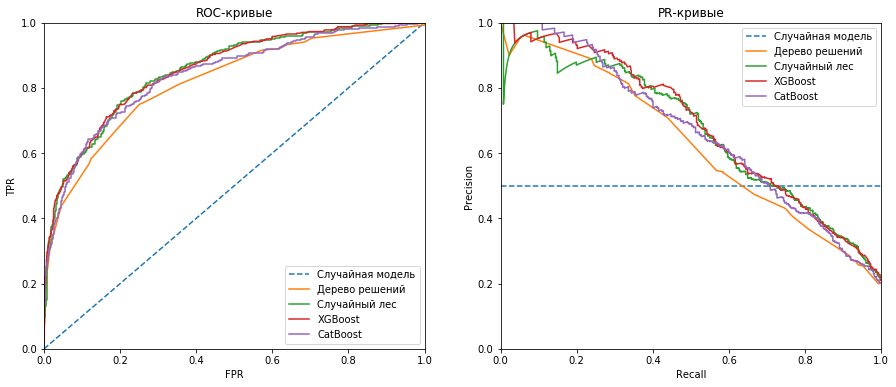

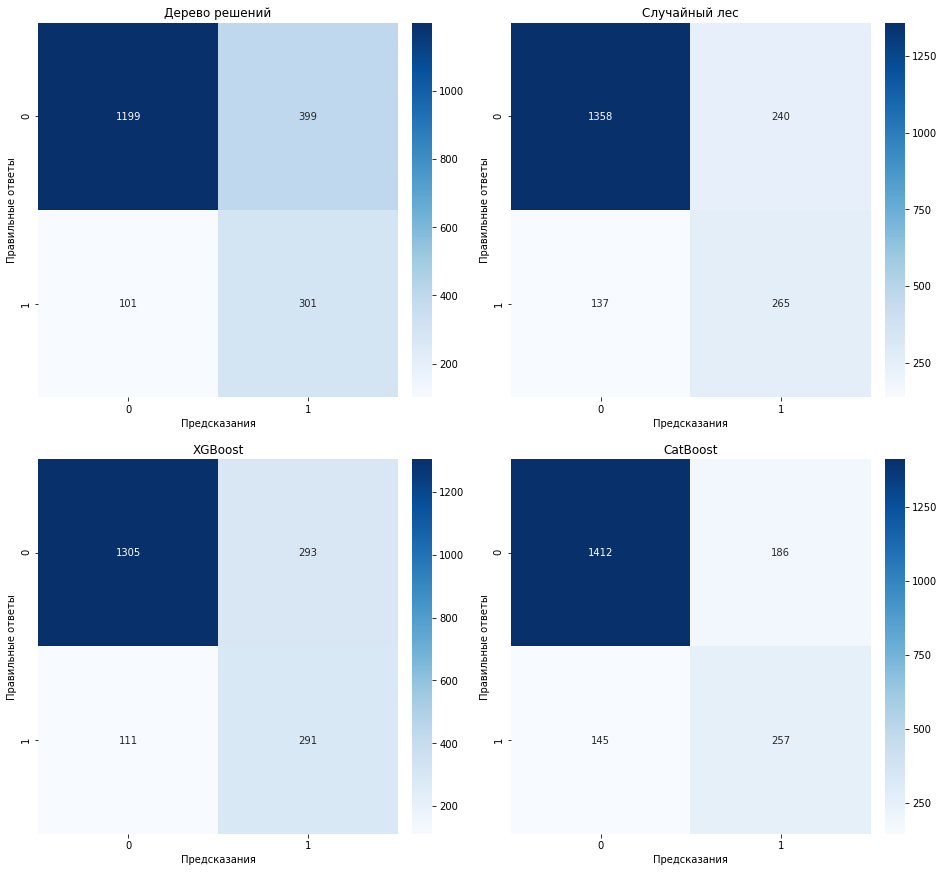

In [66]:
visualize_tests(features_train, target_train)

Кривые метрик у всех трех удовлетворительных моделей достаточно схожие, дерево решений, оказавшееся в аутсайдерах, заметно проседает.

Доли верных решений на тестовой выборке у случайного леса и XGBoost почти равны, CatBoost самую чуточку впереди. CatBoost также показывает меньше всего ложноположительных ответов. Реальный разброс показателей этих трех моделей находится в пределах 1%.

Выбор оптимального порога классификации позволяет незначительно улучшить метрику (также в пределах 1-2%)

### Объединение выборок и повторная проверка

В качестве еще одной проверки объединим обучающую и валидационную выборку в одну, заново обучим модели с наилучшими гиперпараметрами и снова проверим результаты на тестовой выборке:

Дерево решений: Лучшая F1=0.56 с порогом 0.67, ROC_AUC=0.82, accuracy: 75%
Случайный лес: Лучшая F1=0.62 с порогом 0.64, ROC_AUC=0.86, accuracy: 80%
XGBoost: Лучшая F1=0.60 с порогом 0.58, ROC_AUC=0.86, accuracy: 80%
CatBoost: Лучшая F1=0.63 с порогом 0.60, ROC_AUC=0.85, accuracy: 82%


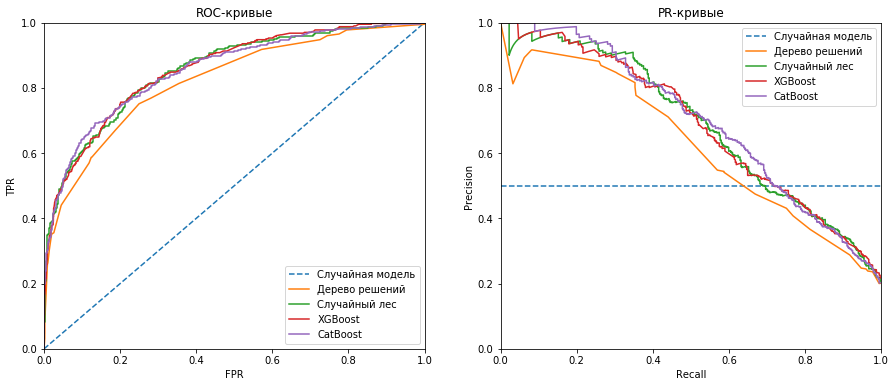

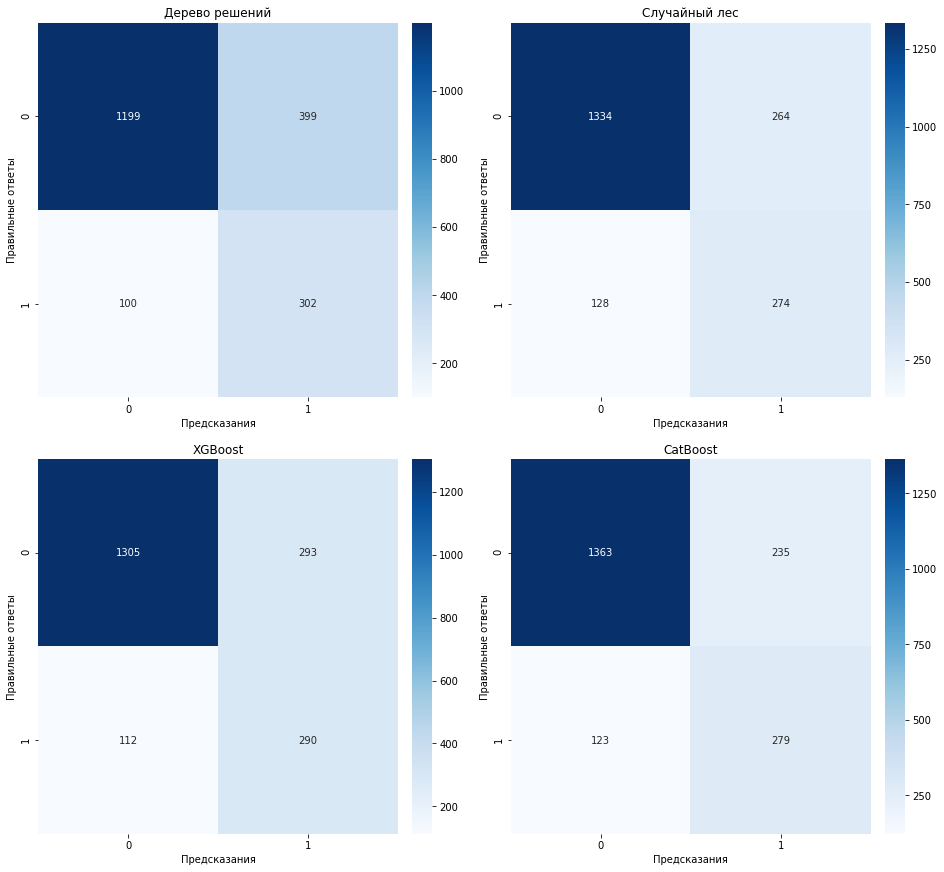

In [67]:
visualize_tests(features_train_valid, target_train_valid, refit=True)

И это испытание три наших лучших модели выдерживают достойно, отставание дерева решений здесь еще более заметно.

### Использование признаков

Посмотрим, насколько важными наши модели считают те или иные признаки, через атрибут модели `feature_importances_`.

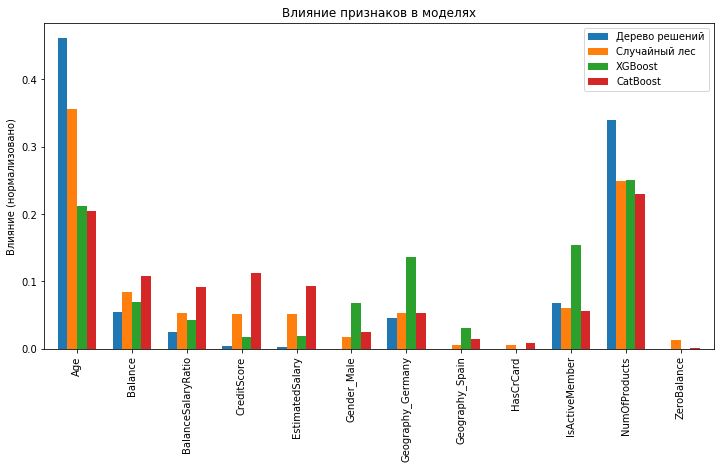

In [68]:
importances = pd.DataFrame()

for model in best_list:
    importance = model.steps[1][1].feature_importances_
    importances = importances.append (pd.Series(importance, index=features_train.columns), ignore_index=True)

# Нормализуем показатели, сведя их к одному масштабу:
importances = importances.div (importances.sum (axis=1), axis=0)
importances.T.plot(kind='bar', figsize=(12,6), width=0.7).set(title="Влияние признаков в моделях", ylabel="Влияние (нормализовано)");
plt.legend(name_list[1:]);

Наш искусственный признак `ZeroBalance` влияет на результат незначительно (сколько-нибудь заметно лишь для случайного леса), зато `BalanceSalaryRatio` используется вполне активно (впрочем, это еще не говорит о влиянии на метрику!). Пол клиента и наличие кредитной карты влияют на ответ моделей слабо.

Модели активно опираются на значение `Age`, как и должно быть, а также `NumOfproducts` (что, возможно, не очень хорошо в перспективе ввиду малой выборки клиентов со значением 3-4). Влияние остальных признаков примерно сопоставимо.

### Сравнение с фиктивными моделями

Проверим, насколько хороша полученная метрика по сравнению с моделями DummyClassifier (случайный выбор, выбор самого частого класса и пр.)

In [69]:
for strategy in ['uniform','most_frequent','stratified','prior']:
    dummy = DummyClassifier(strategy=strategy, random_state=random_state)
    scaler = StandardScaler()
    scaler.fit(features_train_oversampled)
    dummy_train_scaled = scaler.transform(features_train_oversampled)
    features_test_scaled = scaler.transform(features_test)
    dummy.fit(dummy_train_scaled, target_train_oversampled)

    dummy_predictions = dummy.predict(features_test_scaled)
    dummy_probabilities = dummy.predict_proba(features_test_scaled)[:, 1]
    
    if pd.np.count_nonzero(dummy_predictions == 1) > 0:
        dummy_f1 = f1_score(target_test, dummy_predictions)
    else:
        dummy_f1 = 0
        
    dummy_roc_auc = roc_auc_score (target_test, dummy_probabilities)
    dummy_accuracy = accuracy_score(target_test, dummy_predictions)
    
    print(f'Стратегия: {strategy}, F1: {dummy_f1:.2f}, ROC_AUC: {dummy_roc_auc:.2f}, accuracy {dummy_accuracy:.0%}.')

Стратегия: uniform, F1: 0.28, ROC_AUC: 0.50, accuracy 49%.
Стратегия: most_frequent, F1: 0.00, ROC_AUC: 0.50, accuracy 80%.
Стратегия: stratified, F1: 0.30, ROC_AUC: 0.51, accuracy 50%.
Стратегия: prior, F1: 0.00, ROC_AUC: 0.50, accuracy 80%.


Целевая метрика наших моделей заметно лучше, чем у фиктивных: F1 у DummyClassifier не превышает 0,3, а ROC_AUC составляет примерно 0,5, как и положено. Стоит отметить, что метрика accuracy на несбалансированных данных выглядит практически бесполезной: несмотря на явно более высокое качество работы с положительным классом, у наших моделей она не сильно отличается от фиктивной.

## Вывод

Мы подготовили данные, сбалансировали их и испытали несколько моделей классификации (логистическую регрессию, дерево решений, случайный лес и модули градиентного бустинга XGBoost и CatBoost). По итогам выбора наилучшего метода балансировки (в нашем случае - увеличение доли положительного класса до 50% в обучающей выборке) и подбора оптимальных гиперпараметров можно выбрать три модели, отвечающие требованиям техзадания:

- случайный лес не менее чем на 100 деревьев;
- XGBoost также с числом деревьев около 100;
- CatBoost с глубиной 5.

Все они обеспечивают очень близкие показатели метрики (не менее 0,59 F1 с учетом оптимального порога классификации и 0,84 ROC_AUC), подтверждающиеся повторным тестированием.

С практической точки зрения это означает, что:

- из клиентов, действительно собирающихся уйти, модели способны выявить порядка 60%, позволив банку отреагировать и попытаться сохранить их;
- на клиентах, не собирающихся уходить, доля ложных срабатываний составит 10-15% - банк не будет тратить слишком много ресурсов на те же действия в оношении этих клиентов.

### Рекомендации по запонению данных

В целом данные качественные, часть столбца `Tenure`, по-видимому, исключена из выборки сознательно - на Kaggle пропусков нет.

Крайне желательно больше наблюдений с положительным оттоком, это поможет обучению моделей.

Малая выборка клиентов с большим числом банковских продуктов также оставляет сомнения - действительно ли у них все плохо, или эта выборка нерепрезентативна.